# CS 109A/STAT 121A/AC 209A/CSCI E-109A: Homework 2
# Linear and k-NN Regression


**Harvard University**<br/>
**Fall 2017**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader, Rahul Dave, Margo Levine

---

### INSTRUCTIONS

- To submit your assignment follow the instructions given in canvas.
- Restart the kernel and run the whole notebook again before you submit. 
- Do not include your name(s) in the notebook even if you are submitting as a group. 
- If you submit individually and you have worked with someone, please include the name of your [one] partner below. 

---

Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
import statsmodels.api as sm
from statsmodels.api import OLS
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

D:\Users\Dafengzai\Anaconda2\envs\tensorflow\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Predicting Taxi Pickups in NYC

In this homework, we will explore k-nearest neighbor, linear and polynomial regression methods for predicting a quantitative variable. Specifically, we will build regression models that can predict the number of taxi pickups in New York city at any given time of the day. These prediction models will be useful, for example, in monitoring traffic in the city.

The data set for this problem is given in files `dataset_1_train.txt` and `dataset_1_test.txt` as separate training and test sets. The first column in each file contains the time of a day in minutes, and the second column contains the number of pickups observed at that time. The data set covers taxi pickups recorded during different days in Jan 2015 (randomly sampled across days and time of that day).

We will fit regression models that use the time of the day (in minutes) as a predictor and predict the average number of taxi pick ups at that time. The models will be fitted to the training set, and  evaluated on the test set. The performance of the models will be evaluated using the $R^2$ metric. 

**Data Normalization:** As a first step, we suggest that you normalize the `TimeMin` predictor to a value between 0 and 1. This can be done by dividing the time column in the training and test sets by 1440 (i.e. the maximum value the predictor can take). This normalization step would be particularly helpful while fitting polynomial regression models on this data.

# Part (0): EDA

Generate a scatter plot of the training data points, with the time of the day on the X-axis and the number of taxi pickups on the Y-axis. Does the pattern of taxi pickups make intuitive sense to you?

In [5]:
#数据准备
raw_train_1 = np.genfromtxt('dataset_1_train.txt', dtype = 'str')
raw_train = []
raw_train.append(raw_train_1[0].split(','))
for i in raw_train_1[1:]:
    raw_train.append([float(i.split(',')[0])/1440, int(float(i.split(',')[1]))])
traindf = pd.DataFrame(raw_train[1:])
traindf.columns = raw_train[0]
#测试集
raw_test_1 = np.genfromtxt('dataset_1_test.txt', dtype = 'str')
raw_test = []
raw_test.append(raw_test_1[0].split(','))
for i in raw_test_1[1:]:
    raw_test.append([float(i.split(',')[0])/1440, int(float(i.split(',')[1]))])
testdf = pd.DataFrame(raw_test[1:])
testdf.columns = raw_test[0]

In [7]:
traindf

,TimeMin,PickupCount
0,0.597222,33
1,0.011806,75
2,0.337500,13
3,0.208333,5
4,0.267361,10
5,0.443750,37
6,0.568750,28
7,0.613194,35
8,0.479167,27
9,0.047222,95


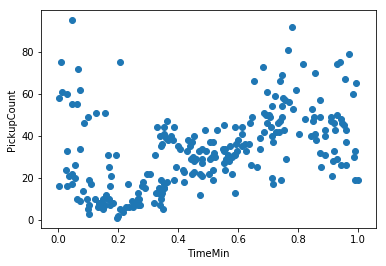

In [11]:
plt.scatter(traindf.TimeMin, traindf.PickupCount)
plt.xlabel('TimeMin')
plt.ylabel('PickupCount')

大体上来说，PickupCount与TimeMin呈现正相关，y随着x的增长而增长，但增长的不明显。

# Part (a): k-Nearest Neighbors

We begin with k-Nearest Neighbors (k-NN), a non-parametric regression technique. You may use `sklearn`'s built-in functions to run k-NN regression. Create a `KNeighborsRegressor` object, use the `fit` method in the object to fit a k-NN regressor model, use the `predict` method to make predictions from the model, and the `score` method to evaluate the $R^2$ score of the model on a data set.

- Fit k-NN regression models:
    - Fit a k-NN regression model to the training set for different values of $k$ (e.g. you may try out values 1, 2, 10, 25, 50, 100 and 200). 
    - If you are using `sklearn`'s built-in functions for k-NN regression, explain what happens when you invoke the `fit` function. 
    - If $n$ is the number of observations in the training set, what can you say about a k-NN regression model that uses $k = n$?
- Visualize the fitted models: 
    - Generate a scatter plot of the training data points, and in the same figure, also generate line plots of the predicted values $\hat{y}$ from each fitted model as a function of the predictor variable $x$. (*Hint:* you will want to sort the $x$ values before plotting.)
    - How does the value of $k$ effect the fitted model?
- Evaluate the fitted models:
    - Compute the $R^2$ score for the fitted models on both the training and test sets. Are some of the calculated $R^2$ values negative? If so, what does this indicate? What does a $R^2$ score of 0 mean?
    - Make plots of the training and test $R^2$ values as a function of $k$. Do the training and test $R^2$ plots exhibit different trends? Explain how the value of $k$ influences the training and test $R^2$ values.

In [255]:
#建模
from sklearn.neighbors import KNeighborsRegressor
x_train = traindf.TimeMin.values.reshape(-1, 1)
y_train = traindf.PickupCount.values
x_test = testdf.TimeMin.values.reshape(-1, 1)
y_test = testdf.PickupCount.values
knn_model = KNeighborsRegressor(n_neighbors = 10)
knn_model.fit(x_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='uniform')

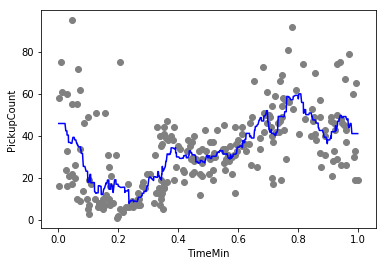

In [256]:
#可视化
plt.scatter(traindf.TimeMin, traindf.PickupCount, color = 'gray')
plt.plot(np.sort(x_test, axis = None), 
         knn_model.predict(np.sort(x_test, axis = None).reshape(-1, 1)), color = 'blue')
plt.xlabel('TimeMin')
plt.ylabel('PickupCount')

In [257]:
#模型评估
#score = r2_score()
print('训练集的R2_score:%f' %knn_model.score(x_train, y_train))
print('测试集的R2_score:%f' %knn_model.score(x_test, y_test))

训练集的R2_score:0.457705
测试集的R2_score:0.417248


R2_score为从0至1之间的数值，表示该模型中目标变量中有百分之多少能够用特征来解释。可能存在负值的情况，代表着数据是完全散乱的。如果R2_score为0，表示因变量几乎没能被特征来预测。

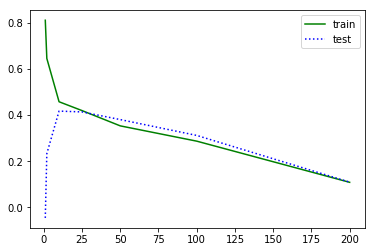

In [73]:
X = [1, 2, 10, 25, 50, 100, 200]
y1 = []
y2 = []
for i in X:
    knn_model = KNeighborsRegressor(n_neighbors = i)
    knn_model.fit(x_train, y_train)
    y1.append(knn_model.score(x_train, y_train))
    y2.append(knn_model.score(x_test, y_test))
plt.plot(X, y1, '-g', label='train')
plt.plot(X, y2, ':b', label='test')
plt.legend();

随着k的增大，训练集的R2_score一直在减小，而测试集的R2_score一开始很小（产生了overfitting），而后变得与训练集的趋势相同。

# Part (b): Simple Linear Regression

We next consider parametric approaches for regression, starting with simple linear regression, which assumes that the response variable has a linear relationship with the predictor. Do you see any advantages in using a parametric regression model over k-NN regression?

We suggest that you use the `statsmodels` module for linear regression. This module has built-in functions to summarize the results of regression, and to compute confidence intervals for estimated regression parameters. Create a `OLS` class instance, use the `fit` method in the instance for fitting a linear regression model, and use the `predict` method to make predictions. To include an intercept term in the regression model, you will need to append a column of 1's to the array of predictors using the `sm.add_constant` method. The `fit` method returns a `results` instance. Use the  `results.summary` method to obtain a summary of the regression fit, the `results.params` attribute to get the estimated regression parameters, and the `conf_int` method to compute confidence intervals for the estimated parameters. You may use the `r2_score` function to compute $R^2$.

Using the suggested built-in functions, answer the following questions:

- Fit a linear regression model to the training set, and evaluate its $R^2$ value on both the training and test sets (you may notice something peculiar about how they compare). 
- How does the test $R^2$ score compare with the best test $R^2$ value obtained with k-NN regression in Part (a)?

- Compute confidence intervals:
    - Print the slope and intercept values for the fitted linear model. What does the sign of the slope convey about the data?
    - Compute the 95% confidence interval for the slope and intercept. Based on this information, do you consider the estimates of the model parameters to be reliable?
    - Do you expect a 99% confidence interval for the slope and intercept to be tighter or looser than the 95% confidence intervals? Briefly explain your answer.

- Analyze residual plots:
    - Make a plot of the residuals ${e} = y - \hat{y}$ of the model on the training set as a function of the predictor variable $x$ (i.e. time of day). Draw a horizontal line denoting the zero residual value on the Y-axis.
    - Using this residual plot, comment on whether the assumption of linearity is valid for this data.

In [94]:
#建模
from statsmodels.api import OLS
#数据准备
raw_x_train = traindf.TimeMin.values
x_train = sm.add_constant(raw_x_train)
y_train = traindf.PickupCount.values
raw_x_test = testdf.TimeMin.values
x_test = sm.add_constant(raw_x_test)
y_test = testdf.PickupCount.values
#
reg_model = OLS(y_train, x_train)
results = reg_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     64.82
Date:                Sat, 11 Nov 2017   Prob (F-statistic):           3.43e-14
Time:                        10:30:46   Log-Likelihood:                -1060.1
No. Observations:                 250   AIC:                             2124.
Df Residuals:                     248   BIC:                             2131.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.0264      2.121      8.501      0.000      13.850      22.203
x1            30.2890      3.762      8.051      0.000      22.879      37.699
==============================================================================
Omnibus:                       56.951   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.977
Skew:                           1.202   Prob(JB):                     7.18e-23
Kurtosis:                       5.002   Cond. No.                         4.42
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [100]:
#验证模型：R2_score
y_pred = results.predict(x_test)
from sklearn.metrics import r2_score
print('训练集的R2_score:%f' %results.rsquared)
print('测试集的R2_score:%f' %r2_score(y_test,y_pred))

训练集的R2_score:0.207214
测试集的R2_score:0.247712


该回归模型的R2_score不论是训练集还是测试集都在0.25一下，而knn的R2_score最好的可以达到0.4。

In [107]:
print('模型的斜率为:%.4f，截距为:%.4f' %(results.params[1], results.params[0]))
print('这表示自变量没增加1，应变量便对应着增加%.4f' %results.params[1])

模型的斜率为:30.2890，截距为:18.0264
这表示自变量没增加1，应变量便对应着增加30.2890


[[ 16.59401711  19.45875324]
 [ 27.74781111  32.83023486]]
因为依据模型的置信区间建立的样本估计并没有包含足够多的样本数据，所以我认为该模型的参数建立是不可靠的


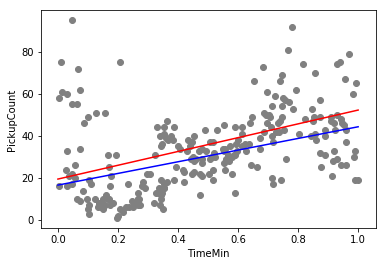

In [122]:
#寻找置信区间（confidence intervals）
print(results.conf_int(0.5))
print('因为依据模型的置信区间建立的样本估计并没有包含足够多的样本数据，所以我认为该模型的参数建立是不可靠的')
#置信区间可视化
plt.scatter(traindf.TimeMin, traindf.PickupCount, color = 'gray')
x = np.linspace(0, 1, 50)
plt.plot(x, x*results.conf_int(0.5)[1][0]+results.conf_int(0.5)[0][0],'-b')
plt.plot(x, x*results.conf_int(0.5)[1][1]+results.conf_int(0.5)[0][1],'-r')
plt.xlabel('TimeMin')
plt.ylabel('PickupCount')

In [123]:
results.conf_int(0.1)

array([[ 14.52536554,  21.52740481],
       [ 24.0777475 ,  36.50029847]])

如果采用99%的置信区间的话，区间会变得比95%的更大。因为此处我们的样本参数选取的是截距与斜率，因此置信水平选取得越高，置信区间就会更大使得参数的真实值落入置信区间的概率增加。

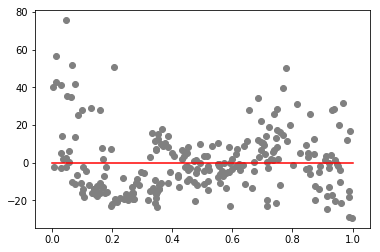

In [150]:
def count_residuals(X,Y):
    y_pred = results.predict(X)
    return Y-y_pred

#残差的可视化
plt.scatter(x_train[:,1], count_residuals(x_train, y_train), color = 'gray')
x = np.linspace(0,1,50)
plt.plot(x, x*0, 'r')

残差在零点附近的分布杂乱无章且不平衡，对于样本0-80的取值范围来说残差的绝对值十分大。因此我认为该线性模型假设不能很好的表达数据。

# Part (c): Polynomial Regression

We proceed to higher-order polynomial models for regression:

- By visual inspection, what polynomial degree do you think would provide the best fit for the data?

- At the start of this assignment, we had advised you to normalize the time predictor in the training and test sets to a value in [0,1], and noted that this would be helpful in fitting polynomial regression models. Had the time predictor not been normalized, what difficulties in implementing polynomial regression may have occurred?

- Fit polynomial regression models of degrees 2, 3, 10, 25 and 50 to the training set, and generate visualizations of the fitted models (in the same figure, plot the predicted value from all models as a function of time). 

- Evaluate the $R^2$ value of the fitted models on both the training and test sets. Does a high training $R^2$ value necessarily indicate a high test $R^2$ value? How do the test $R^2$ values from the different polynomial models compare with the test $R^2$ from simple linear regression in Part (b), and the best test $R^2$ from k-NN regression in Part (a)?

- Generate residual plots for the different polynomial regression models (plot of residuals on training set vs. time). How does the increase in polynomial degree effect the residual plots?

*Hint:* You may use the `PolynomialFeatures` class to include polynomial terms in the regression model.

我认为3次的多项式回归能最好的拟合数据。

若没有对数据进行缩放/normalize，则自变量的取值范围会变得十分巨大（0-1440），这会使得我们的数据集所在的区间显得十分“狭长”，而对于多项式回归方程来说，其中会有许多个回归参数，这意味着我们需要通过梯度下降法来求得残差最小对应的参数。直接对样本进行梯度下降，则其代价函数本身是十分“狭长”的（x十分分散），使得梯度下降的过程十分曲则耗时。

In [194]:
#建模
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
x_train = traindf.TimeMin.values.reshape(-1,1)
y_train = traindf.PickupCount.values
x_test = testdf.TimeMin.values.reshape(-1,1)
y_test = testdf.PickupCount.values
regs = []
degrees = [2, 3, 10, 25, 50]
for i in degrees:
    poly = PolynomialFeatures(i)
    degree_x_train = poly.fit_transform(x_train)[:,1:] #末尾的[:,1:]是为了把常数项1去掉
    reg=LinearRegression()
    reg.fit(degree_x_train, y_train)
    regs.append(reg)

In [216]:
np.shape(y[0])
y[0]

[24.721294414119058, 24.721294414119058]

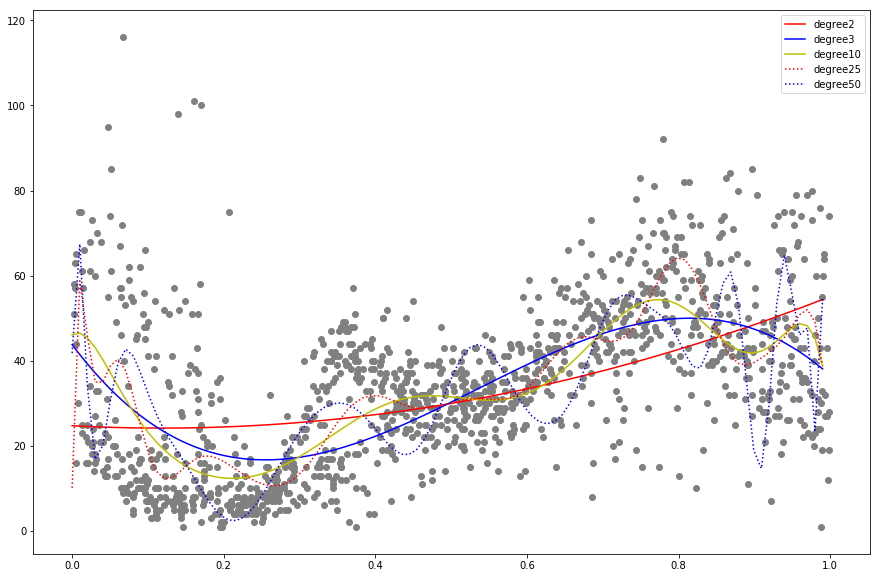

In [254]:
#作不同次数的方程图
plt.figure(figsize=(15,10))
plt.scatter(x_train,y_train, color = 'gray')
plt.scatter(x_test,y_test, color = 'gray')
x = np.linspace(0,0.99,99)
y = []
#求得y
for k in range(len(regs)):
    tem_y = []
    for j in range(len(x)):
        raw_y = 0
        for i in range(len(regs[k].coef_)):
            raw_y += x[j]**(i+1)*regs[k].coef_[i]
        tem_y.append(raw_y+regs[k].intercept_)
    y.append(tem_y)
plt.plot(x,y[0],'r',label = 'degree'+'2')
plt.plot(x,y[1],'b',label = 'degree'+'3')
plt.plot(x,y[2],'y',label = 'degree'+'10')
plt.plot(x,y[3],':r',label = 'degree'+'25')
plt.plot(x,y[4],':b',label = 'degree'+'50')
plt.legend()
   #label = 'degree'+str(degrees[k])

In [253]:
def calculate_R2_score(X, Y, degree):
    poly = PolynomialFeatures(degree)
    degree_X = poly.fit_transform(X)[:,1:] #末尾的[:,1:]是为了把常数项1去掉
    reg.score(degree_X, Y)
for i in range(len(regs)):
    poly = PolynomialFeatures(degrees[i])
    degree_x_train = poly.fit_transform(x_train)[:,1:] #末尾的[:,1:]是为了把常数项1去掉
    degree_x_test = poly.fit_transform(x_test)[:,1:]
    print("degree%d of train's r2_score: %.4f" %(degrees[i],regs[i].score(degree_x_train, y_train)))
    print("degree%d of test's r2_score: %.4f" %(degrees[i],regs[i].score(degree_x_test, y_test)))
 

degree2 of train's r2_score: 0.2324
degree2 of test's r2_score: 0.2557
degree3 of train's r2_score: 0.3748
degree3 of test's r2_score: 0.3786
degree10 of train's r2_score: 0.4283
degree10 of test's r2_score: 0.4020
degree25 of train's r2_score: 0.4667
degree25 of test's r2_score: 0.3938
degree50 of train's r2_score: 0.2146
degree50 of test's r2_score: 0.1093


Evaluate the  R2R2  value of the fitted models on both the training and test sets. Does a high training  R2R2  value necessarily indicate a high test  R2R2  value? How do the test  R2R2  values from the different polynomial models compare with the test  R2R2  from simple linear regression in Part (b), and the best test  R2R2  from k-NN regression in Part (a)?

1.训练集中更高的R2 value并不总意味着测试集中更高的R2 value（如degre25）。  
2.与(b)中0.25以下的R2 value相比，degree2、3、10、25都比简单的单变量线性模型得分好。  
3.与(a)中的knn模型相比，没有哪个次数能达到knn的0.41的R2 value，只有degre10的R2 value比较接近达到了0.40

# Part (d): Summarize Results
In a brief paragraph (8 or fewer sentences), summarize which of the models seen above you would choose to predict the number of taxi cab pick-ups at any specific time of day.  Be sure to explain your choice. Interpret the model you choose, including which predictors are significant and provide and interpret the CIs for their coefficients (if you choose a regression model). How well does you model predict the number of taxi cab pick-ups?  How would you improve this model even further?  Feel free to refer to visual(s) above or provide a new one to make your case.



我将会选择多项式回归(degree = 10)模型来预测数据，虽然该数据集十分的分散，最后的R2_score刚过0.4，但我认为使用多项式回归模型能从中看出数据间一些潜在的联系与趋势，而KNN只是单纯的拟合数据，而分析正是我所看中的。在(c)部分我们可以看到次数增加后产生了过拟合的情况，所以我会在10次数附近做一些尝试，但因为数据集十分的分散，所以最后结果的提高也是有限的。

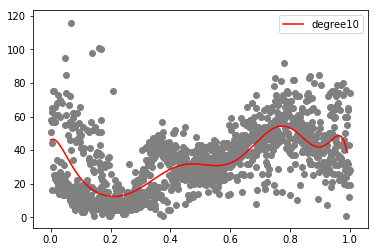

In [259]:
plt.scatter(x_train,y_train, color = 'gray')
plt.scatter(x_test,y_test, color = 'gray')
plt.plot(x,y[2],'r',label = 'degree'+'10')
plt.legend()

---- 


# APCOMP209a - Homework Question

Read Sections 1 and 2 of this [paper](https://www.researchgate.net/profile/Roberto_Togneri/publication/45094554_Linear_Regression_for_Face_Recognition/links/09e4150d243bd8b987000000/Linear-Regression-for-Face-Recognition.pdf). 

Briefly, we have a number of cleaned images of people's faces. The model leverages the concept that "patterns from a single-object class lie on a linear subspace" and the fact that linear regression can be thought of as an orthogonal projection of the response vector (Y) onto the subspace spanned by the columns of the predictor matrix (X).

### Question 1
Consider a space in $\mathbb{R}^5$, with two subspaces $S_0 \subset \mathbb{R}^5$ and $S_1 \subset \mathbb{R}^5$. For simplicity, let us consider the case where the subspace $S_0$ is spanned by the vectors $v_{00} = [1,0,0,0,0]^T$, $v_{01} =[0,1,0,0,0]^T$ and the subspace $S_1$ is spanned by the vectors $v_{10} = [0,0,0,1,0]^T$ and $v_{11} = [0,0,0,0,1]^T$. 

Now let us assume that we have a dataset that consists of labeled vectors in subspaces $S_0$ and $S_1$ respectively. Our task here is to use the data in the training dataset to classify an unknown vector into either $S_0$ or $S_1$.

Let us consider the case where we construct a predictive matrix $\mathbf{X}$ from the 'training' data for which we know the labels (note: is not meant to match $S_0$ and $S_1$ above).

```
dataset = np.array([
            [1,0,0,0,0],
            [1,1,0,0,0],
            [0,0,0,1,1],
            [0,0,0,1,0],
            ])
labels = np.array([0,0,1,1])
```

(Briefly notice that the training data probably doesn't consist of vectors that are orthonormal in spanning $S_0$ or $S_1$).

And we have an unknown vector, for which we want clasify as either a noisy example of a vector in either $S_0$ or $S_1$: ```y_0 = np.array([2,10,1,0,0])```.

In [260]:
# starter code
dataset = np.array([
            [1,0,0,0,0],
            [1,1,0,0,0],
            [0,0,0,1,1],
            [0,0,0,1,0],
            ])
labels = np.array([0,0,1,1])
y_0 = np.array([2,10,1,0,0])

#### Question 1a
Recall the solution for the Least Squares problem and the 'hat' matrix $\mathbf{H}$. Consider the case when $Y$ lies in the same subspace as the columns of $\mathbf{X}$. In this case, how accurate should the prediction of $\hat{Y}$ be?

#### Question 1b
Given the projection of $Y$ onto the space spanned by the columns of the X matrix. We can analyse the significance of the different predictor vectors (i.e. the building blocks that are used to reconstrct the $\hat{Y}$ vector). Discuss how this may help one when analysing a classification decision by the model.

#### Question 1c
As discussed in the linked paper, we have data that has vectors that are classified into one subspace or another (our training dataset). We can use the projection interpretation of linear regression to make a classification decision of a new (unseen) vector into either $S_0$ or $S_1$. In other words, construct X matrices from the known vectors, and project the unknown vector onto the subspaces spanned by the various X matrices using the "hat" interpretation of linear regression. To do classification, we can calculate the minimum euclidean distance ($L_2$ norm) between the original vector and the projection. Use this method to classify ```y_0``` as belonging to either $S_0$ or $S_1$.

**Feel free to run this same example on the face data presented in the paper - you will be doing this for next week's homework regardless**

#### Question 1d (unrelated to the parts above)

Explicitly derive the relationship between the F-statistic (from the usual F test) and the $R^2$ measure in multiple linear regression (i.e. write the F-statistic of a multiple linear regression model in terms of the $R^2$ of the same model).